# FPE - Periodic System

This notebook looks into the simulation of a driven periodic system, in two `flavors'. Speficially, we first look at an overdamped system diffusing in the potential 

$$ E(x, \lambda(t)) = \frac{B^{\dagger}}{2}\sin(2\pi [x - \lambda(t)]) $$

which is a periodic (sinusoidal) potential on the domain $x\in [0, 1]$ with barrier height (trough to well) of $B^{\dagger}$, and where the basin of that potential is give by the (time-dependent) quantity $\lambda(t)$. Here, we assume that the system obexy periodic boundary conditions.  For this scenario, the force is given by

$$ - \partial_x E(x, \lambda(t)) = -B^{\dagger}\pi \cos(2\pi [x - \lambda(t)]) $$

and this the corresponding FPE is 

$$ \partial_t p(x, t) = -\beta D B^{\dagger}\pi \partial_x [\cos\left(2\pi[x - \lambda(t)]\right) p(x, t)] + D\partial_x^2p(x, t) $$

For this situation (and the next), we will be interested in a quantity related to precision---in fact this is very similar to the *clock* precision defined by Seifert *et al.* in Ref[1]---defined as the net flux of probability per rotation of the potential minima. In the case a perfectly translating system, the entirety of the probability will be transported with the minimum, while for a less-that-perfectly precise system, some fraction of the probability will *leak* backwards over the potential barrier, and fail to be transported along with the potential minima. We would expect that, for slow speeds of the potential (small $\dot{\lambda}$) relative to the characteristic diffusion speed and strong potentials ($B^{\dagger} \gg \beta$) the precision will be high, while for fast speeds and weak potentials, the precision will drop.  Ultimately, we will tease out the specificas of this relationship for a constant velocity protocol.  

More concretely, we can measure the flux (at periodic steady state) by simply calculating $J = \partial_x p |_{x^*}$ at an arbitrary location $x^*$, and integrating that expression over a single translation of the trap, or (equivalently), summing the singlke-point flux over all locations at a single point in time (when the system is in a periodic steady state).  Further, In this system, there is no stationary state in the sense of $\partial_t p = 0$, however, the system will achieve a *periodic* steady state (or, more eloquently, a *stroboscopic* steady state) when $p(x, t) = p(x,t+n\tau)$ for some period $\tau$ and all $n \geq 1$ [2, 3].

Next, we will look at the same relationship, in a more complex system, where the time-dependent potential drags the system over a non-flat underlying energy landscape.  Specfically, we assume an underlying (periodic) static potential

$$ E_{\rm static}(x) = \frac{A^{\dagger}}{2}\cos(6\pi x) $$

so that the total potential experienced by the system at any point in time is

$$ E_{\rm tot}(x, t) = \frac{1}{2}\left[ A^{\dagger}\cos(6\pi x) + B^{\dagger}\cos(2\pi (x - \lambda(t))) \right] $$

By investigating this system, we can look at how strongly deviations in the underlying landscape impact the precision of the system as a whole.

#### References
- [1] Seifert Brownian Clocks
- [2] Kasper
- [3] Large Periodic Steady State

In [12]:
#First, import the necessary code
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Iterable, Optional
from pathlib import Path
sns.set(style="darkgrid", palette="hls")

from FPE.Integrator import FPE_Integrator_1D
import FPE.forceFunctions as ff

# Dynamics parameters
D = 1.0
dt = 0.0001
dx = 0.005
x_array = np.arange(0, 1, dx)

# To start, initialize an integrator object
fpe = FPE_Integrator_1D(D, dt, dx, x_array, boundaryCond="periodic", output=False)

In [13]:
# Parameters for periodic force function are (amp, nMin, minPos)
# So we can initialize a system in a Gaussian distribution and observe the
# relaxation in to the periodic system equilibirium
amp = 2.0
nMin = 1.0
minPos = 0.5

fpe.prob = np.ones_like(x_array)  # in this case the uniform distribution is at magnitude 1
cfl_status = fpe.check_CFL((amp, nMin, minPos), ff.periodicForce)
print(f"CFL status : {cfl_status}")

prob_tracker = []
time_tracker = []
curr_time = 0
counter = 0

params = (amp, nMin, minPos)

while curr_time < 0.25:
    if counter % 10 == 0: 
        prob_tracker.append(fpe.prob)
        time_tracker.append(curr_time)
    fpe.integrate_step(params, ff.periodicForce)
    curr_time += fpe.dt
    counter += 1

CFL status : True


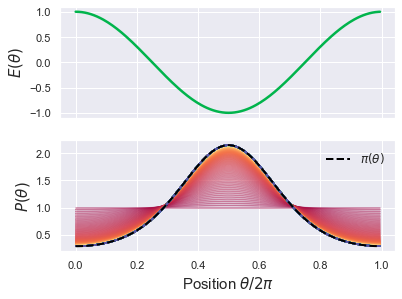

In [16]:
# Now we can plot the theoretical equilibrium distribution, as compared to the 
# empirical final distribution
eq_prob = np.exp(-ff.periodicEnergy(x_array, params))
eq_prob = eq_prob / (np.sum(eq_prob) * dx)

fig, ax = plt.subplots(2, 1, figsize=(6, 4.5), sharex=True)
Pal = sns.color_palette("Spectral", len(prob_tracker))

ax[0].plot(x_array, ff.periodicEnergy(x_array, params), linewidth=2.5, color=sns.xkcd_rgb["shamrock"])
for i, prob in enumerate(prob_tracker):
    ax[1].plot(x_array, prob, color=Pal[i], alpha=0.5)

ax[1].plot(x_array, eq_prob, '--', linewidth=2.0, color='k', label=r"$\pi(\theta)$")

ax[0].set_ylabel(r"$E(\theta)$", fontsize=15)
ax[1].set_xlabel(r"Position $\theta/2\pi$", fontsize=15)
ax[1].set_ylabel(r"$P(\theta)$", fontsize=15)
ax[1].legend(fontsize=12, frameon=False)


In [19]:
# So, here we see that, starting from a uniform distribution, the system is able to 
# relax to the correct equilibirum, as expected.
# We can also do this for multiple minima
amp = 2.0
nMin = 0.5
minPos = 0.5

fpe.prob = np.ones_like(x_array)  # in this case the uniform distribution is at magnitude 1
cfl_status = fpe.check_CFL((amp, nMin, minPos), ff.periodicForce)
print(f"CFL status : {cfl_status}")

prob_tracker = []
time_tracker = []
curr_time = 0
counter = 0

params = (amp, nMin, minPos)

while curr_time < 0.25:
    if counter % 10 == 0: 
        prob_tracker.append(fpe.prob)
        time_tracker.append(curr_time)
    fpe.integrate_step(params, ff.periodicForce)
    curr_time += fpe.dt
    counter += 1

CFL status : True


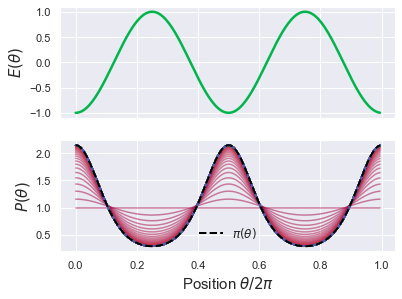

In [20]:
# Now we can plot the theoretical equilibrium distribution, as compared to the 
# empirical final distribution
eq_prob = np.exp(-ff.periodicEnergy(x_array, params))
eq_prob = eq_prob / (np.sum(eq_prob) * dx)

fig, ax = plt.subplots(2, 1, figsize=(6, 4.5), sharex=True)
Pal = sns.color_palette("Spectral", len(prob_tracker))

ax[0].plot(x_array, ff.periodicEnergy(x_array, params), linewidth=2.5, color=sns.xkcd_rgb["shamrock"])
for i, prob in enumerate(prob_tracker):
    ax[1].plot(x_array, prob, color=Pal[i], alpha=0.5)

ax[1].plot(x_array, eq_prob, '--', linewidth=2.0, color='k', label=r"$\pi(\theta)$")

ax[0].set_ylabel(r"$E(\theta)$", fontsize=15)
ax[1].set_xlabel(r"Position $\theta/2\pi$", fontsize=15)
ax[1].set_ylabel(r"$P(\theta)$", fontsize=15)
ax[1].legend(fontsize=12, frameon=False)


In [31]:
# Now, we want to look at the case of a system within a constantly rotating periodic potential
# Here, similar to the harmonic potential, we can (in this case) write down an effective
# Fokker planck equation in the reference frame that comoves with the minima.  
# MARKDOWN CELL HER SHOWING THIS DERIVATION AND RESULTING EQUATION

# Inititialize the system in its equiliibrium distribution
amp = 2.0
minPos = 0.5
cpVel = 8.0

cfl_status = fpe.check_CFL((amp, nMin, minPos), ff.periodicForce_constVel)
print(f"CFL status : {cfl_status}")

prob_tracker = []
time_tracker = []
curr_time = 0
counter = 0

eq_dist = np.exp(-ff.periodicEnergy(x_array, (amp, 1, minPos)))
eq_dist = eq_dist / np.sum(eq_dist * dx)
fpe.prob = eq_dist

params = (amp, minPos, cpVel)

while curr_time < 0.25:
    if counter % 10 == 0: 
        prob_tracker.append(fpe.prob)
        time_tracker.append(curr_time)
    fpe.integrate_step(params, ff.periodicForce_constVel)
    curr_time += fpe.dt
    counter += 1

CFL status : True


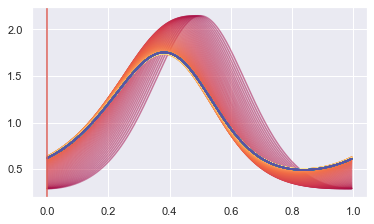

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
Pal = sns.color_palette("Spectral", len(prob_tracker))
for i, prob in enumerate(prob_tracker):
    ax.plot(x_array, prob, color=Pal[i], alpha=0.5)

ax.axvline()
